In [ ]:
what is random state?

# DecisionTreeRegressor

In [23]:
for classification measures :
    -classification matrix
    -confusion matrix
    
for regression measures:
    -meanAbErr
    -MeanSqErr
    -RootMeanSqr

SyntaxError: invalid syntax (Temp/ipykernel_1672/4051276414.py, line 1)

In [1]:
import pandas as pd
fuel_cons = pd.read_csv('petrol_consumption.csv')


In [3]:
fuel_cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
fuel_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [7]:
print(fuel_cons.shape)

(48, 5)


In [12]:
pred_var=fuel_cons.drop(columns='Petrol_Consumption')
pred_var.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [15]:
target=fuel_cons['Petrol_Consumption'] 
target.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pred_var,target,test_size=0.30,random_state=123)

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2,max_features=4)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2, max_features=4)

In [42]:
y_pred=dtr.predict(x_test)

In [43]:
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df.head()

,Actual,predicted
9,498,500.777778
45,510,500.777778
36,640,593.347826
6,344,500.777778
4,410,593.347826


In [44]:
from sklearn import metrics
import numpy as np
print("mean_absolute_error=",metrics.mean_absolute_error(y_test,y_pred))
print("mean_squared_error=",metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score:",metrics.r2_score(y_test,y_pred))

mean_absolute_error= 88.97037037037038
mean_squared_error= 15358.659772690145
123.9300600043837
r2_score: 0.108691263830475


[Text(200.88000000000002, 181.2, 'X[3] <= 0.667\nmse = 9973.702\nsamples = 33\nvalue = 579.455'),
 Text(133.92000000000002, 108.72, 'X[1] <= 4419.0\nmse = 5420.215\nsamples = 32\nvalue = 567.312'),
 Text(66.96000000000001, 36.23999999999998, 'mse = 3493.096\nsamples = 23\nvalue = 593.348'),
 Text(200.88000000000002, 36.23999999999998, 'mse = 4185.951\nsamples = 9\nvalue = 500.778'),
 Text(267.84000000000003, 108.72, 'mse = 0.0\nsamples = 1\nvalue = 968.0')]

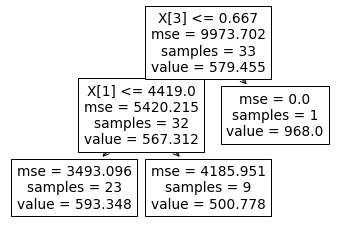

In [46]:
from sklearn import tree
tree.plot_tree(dtr)

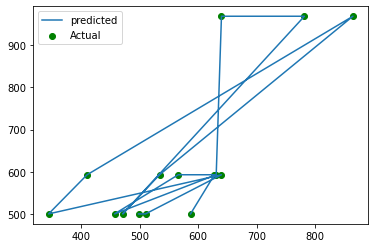

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test,y_pred,color='green',label="Actual")
plt.plot(y_test,y_pred,label="predicted")
plt.legend()

<AxesSubplot:>

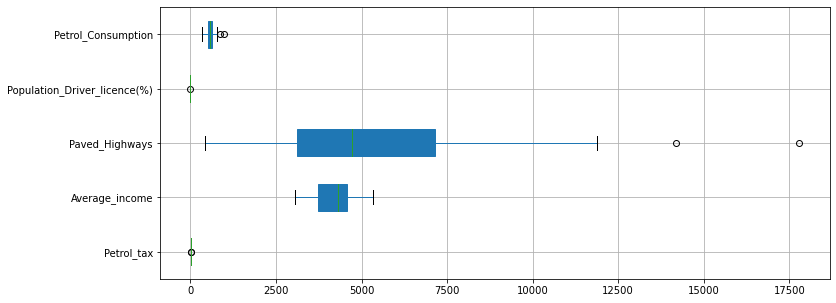

In [61]:
plt.figure(figsize=(12,5))
fuel_cons.boxplot(patch_artist=True,vert=False)

In [66]:
my_corr=fuel_cons.corr() # to get co relations
print(my_corr)

                              Petrol_tax  Average_income  Paved_Highways  \
Petrol_tax                      1.000000        0.012665       -0.522130   
Average_income                  0.012665        1.000000        0.050163   
Paved_Highways                 -0.522130        0.050163        1.000000   
Population_Driver_licence(%)   -0.288037        0.157070       -0.064129   
Petrol_Consumption             -0.451280       -0.244862        0.019042   

                              Population_Driver_licence(%)  Petrol_Consumption  
Petrol_tax                                       -0.288037           -0.451280  
Average_income                                    0.157070           -0.244862  
Paved_Highways                                   -0.064129            0.019042  
Population_Driver_licence(%)                      1.000000            0.698965  
Petrol_Consumption                                0.698965            1.000000  


In [67]:
my_corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot:>

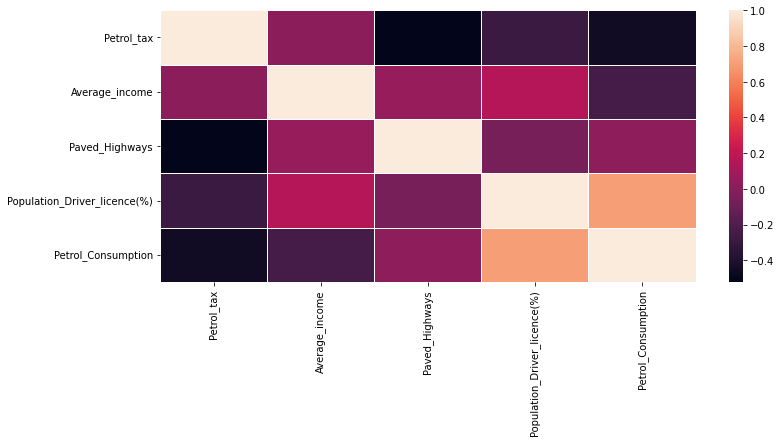

In [69]:
plt.figure(figsize=(12,5))                 # it gives  corelations
sns.heatmap(my_corr,linewidth=0.5)


# corelations
-petrol tax and paved highways

-petrol consumption and petrol tax

-paved highways and petrol tax

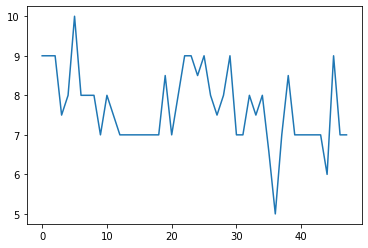

In [70]:
plt.plot(fuel_cons['Petrol_tax'])

<Figure size 864x360 with 0 Axes>

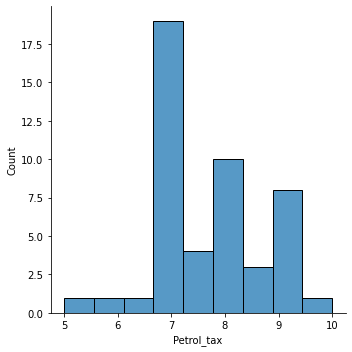

In [73]:
plt.figure(figsize=(12,5))
sns.displot(fuel_cons['Petrol_tax'])

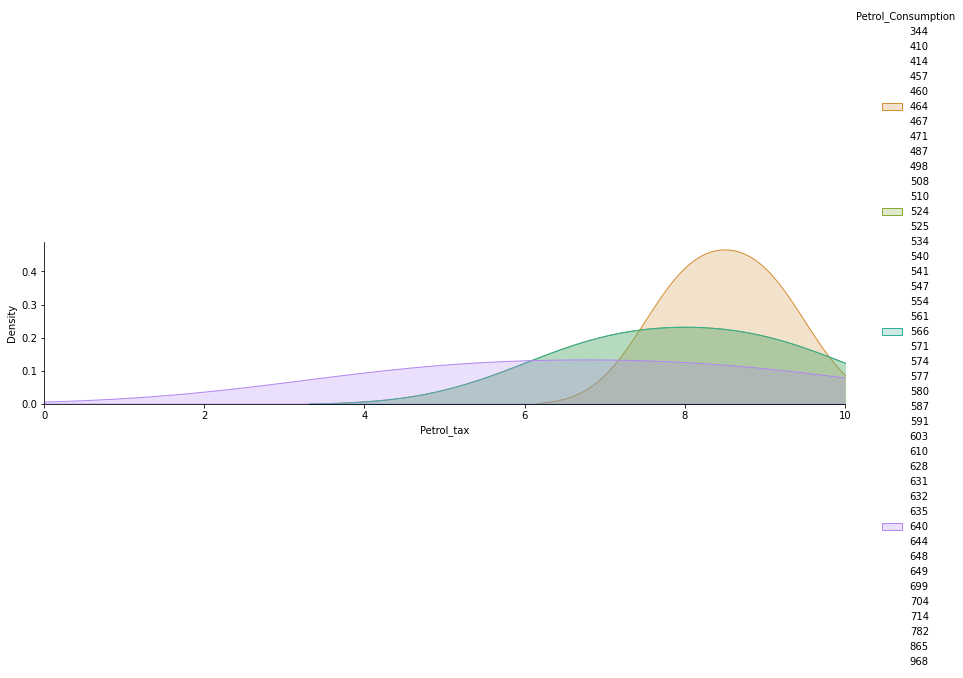

In [85]:
import warnings
warnings.filterwarnings('ignore')
a=sns.FacetGrid(fuel_cons,hue='Petrol_Consumption',aspect=4)
a.map(sns.kdeplot,'Petrol_tax',shade=True)
a.set(xlim=(0,fuel_cons['Petrol_tax'].max()))
a.add_legend()
